In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset_3.csv',header=None)
df.columns=['Index','PHIX1','PHIX2','Y']
df = df.set_index('Index')
df['Y']=df['Y'].replace(0,-1)
print("Preprocessing done")

Preprocessing done


Preparing Scatterplot


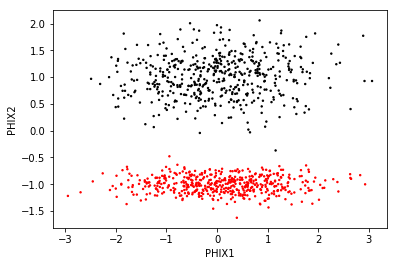

In [3]:
print("Preparing Scatterplot")
colors = np.where(df.Y == -1 , 'r', 'k') #Colors to classes, Red to 1 and Black to -1
df.plot(kind='scatter', x='PHIX1', y='PHIX2', s=2, c=colors)
plt.show()

In [4]:
#A helper function to create a line
#Input : Weights W
#Output : A plot with the line corresponding to W
def plot_disc(W,epoch):
    #Draw the line
    #W[0] + W[1]*x + W[2]*y=0
    #y = mx + b
    m=-1*W[1]/W[2]
    b=-1*W[0]/W[2]
    phix1 = np.linspace(-5,5,100)
    phix2 = m*phix1 + b
    plt.plot(phix1, phix2, '-r', label='Discriminator')
    plt.title('Graph of Perceptron Discriminator')
    plt.xlabel('PHIX1', color='#1C2833')
    plt.ylabel('PHIX2', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.savefig('img'+str(epoch)+'.png')
    plt.show()
    

In [8]:
#BATCH GRADIENT DESCENT
count=10
x=[]
sum_e=0
while(count!=0):
    epochs=0
    learning_rate = 0.0001
    np.random.seed(count)
    W=np.random.randn(3,1)

    #print(W)
    #print("EPOCH NUMBER : ", epochs)

    #df.plot(kind='scatter', x='PHIX1', y='PHIX2', s=2, c=colors)
    #plot_disc(W,epochs)
    x_epochs=[]
    y_errors=[]
    x_epochs.append(epochs)
    while(epochs!=1000):
        df = df.sample(frac=1)
        #Take the previous line and do the substitution
        results = W[0] + W[1]*df['PHIX1'] + W[2]*df['PHIX2']
        activated = W[0] + W[1]*df['PHIX1'] + W[2]*df['PHIX2']
        activated[activated<0]=-1
        activated[activated>=0]=1
        #Take the missclassified points only
        #print("Number of misclassified points : ", len(results[activated!=df['Y']]))
        #Find total error
        new_error=-1*sum((results * df['Y'])[activated!=df['Y']])
        #print("Total Error : ", new_error)
        y_errors.append(new_error)
        if(new_error==0):
            break
        old_error=-1*sum((results * df['Y'])[activated!=df['Y']])

        #Do the gradient descent
        W[0] = W[0] + learning_rate * sum(df['Y'][activated!=df['Y']])
        W[1] = W[1] + learning_rate * sum((df['Y']*df['PHIX1'])[activated!=df['Y']])
        W[2] = W[2] + learning_rate * sum((df['Y']*df['PHIX2'])[activated!=df['Y']])

        #print("NEW WEIGHTS FOUND")
        #New weights found!!
        #Scatter the points
        epochs+=1
        #print("")
        print("EPOCH NUMBER : ", epochs)
        x_epochs.append(epochs)
        #df.plot(kind='scatter', x='PHIX1', y='PHIX2', s=2, c=colors)
        #plot_disc(W,epochs)
    #print(epochs,",")
    sum_e+=epochs
    count-=1
print(sum_e/10)

EPOCH NUMBER :  1
EPOCH NUMBER :  2
EPOCH NUMBER :  3
EPOCH NUMBER :  4
EPOCH NUMBER :  5
EPOCH NUMBER :  6
EPOCH NUMBER :  7
EPOCH NUMBER :  8
EPOCH NUMBER :  9
EPOCH NUMBER :  10
EPOCH NUMBER :  11
EPOCH NUMBER :  12
EPOCH NUMBER :  13
EPOCH NUMBER :  14
EPOCH NUMBER :  15
EPOCH NUMBER :  16
EPOCH NUMBER :  17
EPOCH NUMBER :  18
EPOCH NUMBER :  19
EPOCH NUMBER :  20
EPOCH NUMBER :  21
EPOCH NUMBER :  22
EPOCH NUMBER :  23
EPOCH NUMBER :  24
EPOCH NUMBER :  25
EPOCH NUMBER :  26
EPOCH NUMBER :  27
EPOCH NUMBER :  28
EPOCH NUMBER :  29
EPOCH NUMBER :  30
EPOCH NUMBER :  31
EPOCH NUMBER :  32
EPOCH NUMBER :  33
EPOCH NUMBER :  34
EPOCH NUMBER :  35
EPOCH NUMBER :  36
EPOCH NUMBER :  37
EPOCH NUMBER :  38
EPOCH NUMBER :  39
EPOCH NUMBER :  40
EPOCH NUMBER :  41
EPOCH NUMBER :  42
EPOCH NUMBER :  43
EPOCH NUMBER :  44
EPOCH NUMBER :  45
EPOCH NUMBER :  46
EPOCH NUMBER :  47
EPOCH NUMBER :  48
EPOCH NUMBER :  49
EPOCH NUMBER :  50
EPOCH NUMBER :  51
EPOCH NUMBER :  52
EPOCH NUMBER :  53
EP

EPOCH NUMBER :  111
EPOCH NUMBER :  112
EPOCH NUMBER :  113
EPOCH NUMBER :  114
EPOCH NUMBER :  115
EPOCH NUMBER :  116
EPOCH NUMBER :  117
EPOCH NUMBER :  118
EPOCH NUMBER :  119
EPOCH NUMBER :  120
EPOCH NUMBER :  121
EPOCH NUMBER :  122
EPOCH NUMBER :  123
EPOCH NUMBER :  124
EPOCH NUMBER :  125
EPOCH NUMBER :  126
EPOCH NUMBER :  127
EPOCH NUMBER :  128
EPOCH NUMBER :  129
EPOCH NUMBER :  130
EPOCH NUMBER :  131
EPOCH NUMBER :  132
EPOCH NUMBER :  133
EPOCH NUMBER :  134
EPOCH NUMBER :  135
EPOCH NUMBER :  136
EPOCH NUMBER :  137
EPOCH NUMBER :  138
EPOCH NUMBER :  139
EPOCH NUMBER :  1
EPOCH NUMBER :  2
EPOCH NUMBER :  3
EPOCH NUMBER :  4
EPOCH NUMBER :  5
EPOCH NUMBER :  6
EPOCH NUMBER :  7
EPOCH NUMBER :  8
EPOCH NUMBER :  9
EPOCH NUMBER :  10
EPOCH NUMBER :  11
EPOCH NUMBER :  12
EPOCH NUMBER :  13
EPOCH NUMBER :  14
EPOCH NUMBER :  15
EPOCH NUMBER :  16
EPOCH NUMBER :  17
EPOCH NUMBER :  18
EPOCH NUMBER :  19
EPOCH NUMBER :  20
EPOCH NUMBER :  21
EPOCH NUMBER :  22
EPOCH NUMBE

EPOCH NUMBER :  399
EPOCH NUMBER :  400
EPOCH NUMBER :  401
EPOCH NUMBER :  402
EPOCH NUMBER :  403
EPOCH NUMBER :  404
EPOCH NUMBER :  405
EPOCH NUMBER :  406
EPOCH NUMBER :  407
EPOCH NUMBER :  408
EPOCH NUMBER :  409
EPOCH NUMBER :  410
EPOCH NUMBER :  411
EPOCH NUMBER :  412
EPOCH NUMBER :  413
EPOCH NUMBER :  414
EPOCH NUMBER :  415
EPOCH NUMBER :  416
EPOCH NUMBER :  417
EPOCH NUMBER :  418
EPOCH NUMBER :  419
EPOCH NUMBER :  420
EPOCH NUMBER :  421
EPOCH NUMBER :  422
EPOCH NUMBER :  423
EPOCH NUMBER :  424
EPOCH NUMBER :  425
EPOCH NUMBER :  426
EPOCH NUMBER :  427
EPOCH NUMBER :  428
EPOCH NUMBER :  429
EPOCH NUMBER :  430
EPOCH NUMBER :  431
EPOCH NUMBER :  432
EPOCH NUMBER :  433
EPOCH NUMBER :  434
EPOCH NUMBER :  435
EPOCH NUMBER :  436
EPOCH NUMBER :  437
EPOCH NUMBER :  438
EPOCH NUMBER :  439
EPOCH NUMBER :  440
EPOCH NUMBER :  441
EPOCH NUMBER :  442
EPOCH NUMBER :  443
EPOCH NUMBER :  444
EPOCH NUMBER :  445
EPOCH NUMBER :  446
EPOCH NUMBER :  447
EPOCH NUMBER :  448


EPOCH NUMBER :  814
EPOCH NUMBER :  815
EPOCH NUMBER :  816
EPOCH NUMBER :  817
EPOCH NUMBER :  818
EPOCH NUMBER :  819
EPOCH NUMBER :  820
EPOCH NUMBER :  821
EPOCH NUMBER :  822
EPOCH NUMBER :  823
EPOCH NUMBER :  824
EPOCH NUMBER :  825
EPOCH NUMBER :  826
EPOCH NUMBER :  827
EPOCH NUMBER :  828
EPOCH NUMBER :  829
EPOCH NUMBER :  830
EPOCH NUMBER :  831
EPOCH NUMBER :  832
EPOCH NUMBER :  833
EPOCH NUMBER :  834
EPOCH NUMBER :  835
EPOCH NUMBER :  836
EPOCH NUMBER :  837
EPOCH NUMBER :  838
EPOCH NUMBER :  839
EPOCH NUMBER :  840
EPOCH NUMBER :  841
EPOCH NUMBER :  842
EPOCH NUMBER :  843
EPOCH NUMBER :  844
EPOCH NUMBER :  845
EPOCH NUMBER :  846
EPOCH NUMBER :  847
EPOCH NUMBER :  848
EPOCH NUMBER :  849
EPOCH NUMBER :  850
EPOCH NUMBER :  851
EPOCH NUMBER :  852
EPOCH NUMBER :  853
EPOCH NUMBER :  854
EPOCH NUMBER :  855
EPOCH NUMBER :  856
EPOCH NUMBER :  857
EPOCH NUMBER :  858
EPOCH NUMBER :  859
EPOCH NUMBER :  860
EPOCH NUMBER :  861
EPOCH NUMBER :  862
EPOCH NUMBER :  863


EPOCH NUMBER :  368
EPOCH NUMBER :  369
EPOCH NUMBER :  370
EPOCH NUMBER :  371
EPOCH NUMBER :  372
EPOCH NUMBER :  373
EPOCH NUMBER :  374
EPOCH NUMBER :  375
EPOCH NUMBER :  376
EPOCH NUMBER :  377
EPOCH NUMBER :  378
EPOCH NUMBER :  379
EPOCH NUMBER :  380
EPOCH NUMBER :  381
EPOCH NUMBER :  382
EPOCH NUMBER :  383
EPOCH NUMBER :  384
EPOCH NUMBER :  385
EPOCH NUMBER :  386
EPOCH NUMBER :  387
EPOCH NUMBER :  388
EPOCH NUMBER :  389
EPOCH NUMBER :  390
EPOCH NUMBER :  391
EPOCH NUMBER :  392
EPOCH NUMBER :  393
EPOCH NUMBER :  394
EPOCH NUMBER :  395
EPOCH NUMBER :  396
EPOCH NUMBER :  397
EPOCH NUMBER :  398
EPOCH NUMBER :  399
EPOCH NUMBER :  400
EPOCH NUMBER :  401
EPOCH NUMBER :  402
EPOCH NUMBER :  403
EPOCH NUMBER :  404
EPOCH NUMBER :  405
EPOCH NUMBER :  406
EPOCH NUMBER :  407
EPOCH NUMBER :  408
EPOCH NUMBER :  409
EPOCH NUMBER :  410
EPOCH NUMBER :  411
EPOCH NUMBER :  412
EPOCH NUMBER :  413
EPOCH NUMBER :  414
EPOCH NUMBER :  415
EPOCH NUMBER :  416
EPOCH NUMBER :  417


EPOCH NUMBER :  250
EPOCH NUMBER :  251
EPOCH NUMBER :  252
EPOCH NUMBER :  253
EPOCH NUMBER :  254
EPOCH NUMBER :  255
EPOCH NUMBER :  256
EPOCH NUMBER :  257
EPOCH NUMBER :  258
EPOCH NUMBER :  259
EPOCH NUMBER :  260
EPOCH NUMBER :  261
EPOCH NUMBER :  262
EPOCH NUMBER :  263
EPOCH NUMBER :  264
EPOCH NUMBER :  265
EPOCH NUMBER :  266
EPOCH NUMBER :  267
EPOCH NUMBER :  268
EPOCH NUMBER :  269
EPOCH NUMBER :  270
EPOCH NUMBER :  271
EPOCH NUMBER :  272
EPOCH NUMBER :  273
EPOCH NUMBER :  274
EPOCH NUMBER :  275
EPOCH NUMBER :  276
EPOCH NUMBER :  277
EPOCH NUMBER :  278
EPOCH NUMBER :  279
EPOCH NUMBER :  280
EPOCH NUMBER :  281
EPOCH NUMBER :  282
EPOCH NUMBER :  283
EPOCH NUMBER :  284
EPOCH NUMBER :  285
EPOCH NUMBER :  286
EPOCH NUMBER :  287
EPOCH NUMBER :  288
EPOCH NUMBER :  289
EPOCH NUMBER :  290
EPOCH NUMBER :  291
EPOCH NUMBER :  292
EPOCH NUMBER :  293
EPOCH NUMBER :  294
EPOCH NUMBER :  295
EPOCH NUMBER :  296
EPOCH NUMBER :  297
EPOCH NUMBER :  298
EPOCH NUMBER :  299


EPOCH NUMBER :  673
EPOCH NUMBER :  674
EPOCH NUMBER :  675
EPOCH NUMBER :  676
EPOCH NUMBER :  677
EPOCH NUMBER :  678
EPOCH NUMBER :  679
EPOCH NUMBER :  680
EPOCH NUMBER :  681
EPOCH NUMBER :  682
EPOCH NUMBER :  683
EPOCH NUMBER :  684
EPOCH NUMBER :  685
EPOCH NUMBER :  686
EPOCH NUMBER :  687
EPOCH NUMBER :  688
EPOCH NUMBER :  689
EPOCH NUMBER :  690
EPOCH NUMBER :  691
EPOCH NUMBER :  692
EPOCH NUMBER :  693
EPOCH NUMBER :  694
EPOCH NUMBER :  695
EPOCH NUMBER :  696
EPOCH NUMBER :  697
EPOCH NUMBER :  698
EPOCH NUMBER :  699
EPOCH NUMBER :  700
EPOCH NUMBER :  701
EPOCH NUMBER :  702
EPOCH NUMBER :  703
EPOCH NUMBER :  704
EPOCH NUMBER :  705
EPOCH NUMBER :  706
EPOCH NUMBER :  707
EPOCH NUMBER :  708
EPOCH NUMBER :  709
EPOCH NUMBER :  710
EPOCH NUMBER :  711
EPOCH NUMBER :  712
EPOCH NUMBER :  713
EPOCH NUMBER :  714
EPOCH NUMBER :  715
EPOCH NUMBER :  716
EPOCH NUMBER :  717
EPOCH NUMBER :  718
EPOCH NUMBER :  719
EPOCH NUMBER :  720
EPOCH NUMBER :  721
EPOCH NUMBER :  722


EPOCH NUMBER :  29
EPOCH NUMBER :  30
EPOCH NUMBER :  31
EPOCH NUMBER :  32
EPOCH NUMBER :  33
EPOCH NUMBER :  34
EPOCH NUMBER :  35
EPOCH NUMBER :  36
EPOCH NUMBER :  37
EPOCH NUMBER :  38
EPOCH NUMBER :  39
EPOCH NUMBER :  40
EPOCH NUMBER :  41
EPOCH NUMBER :  42
EPOCH NUMBER :  43
EPOCH NUMBER :  44
EPOCH NUMBER :  45
EPOCH NUMBER :  46
EPOCH NUMBER :  47
EPOCH NUMBER :  48
EPOCH NUMBER :  49
EPOCH NUMBER :  50
EPOCH NUMBER :  51
EPOCH NUMBER :  52
EPOCH NUMBER :  53
EPOCH NUMBER :  54
EPOCH NUMBER :  55
EPOCH NUMBER :  56
EPOCH NUMBER :  57
EPOCH NUMBER :  58
EPOCH NUMBER :  59
EPOCH NUMBER :  60
EPOCH NUMBER :  61
EPOCH NUMBER :  62
EPOCH NUMBER :  63
EPOCH NUMBER :  64
EPOCH NUMBER :  65
EPOCH NUMBER :  66
EPOCH NUMBER :  67
EPOCH NUMBER :  68
EPOCH NUMBER :  69
EPOCH NUMBER :  70
EPOCH NUMBER :  71
EPOCH NUMBER :  72
EPOCH NUMBER :  73
EPOCH NUMBER :  74
EPOCH NUMBER :  75
EPOCH NUMBER :  76
EPOCH NUMBER :  77
EPOCH NUMBER :  78
EPOCH NUMBER :  79
EPOCH NUMBER :  80
EPOCH NUMBER

EPOCH NUMBER :  444
EPOCH NUMBER :  445
EPOCH NUMBER :  446
EPOCH NUMBER :  447
EPOCH NUMBER :  448
EPOCH NUMBER :  449
EPOCH NUMBER :  450
EPOCH NUMBER :  451
EPOCH NUMBER :  452
EPOCH NUMBER :  453
EPOCH NUMBER :  454
EPOCH NUMBER :  455
EPOCH NUMBER :  456
EPOCH NUMBER :  457
EPOCH NUMBER :  458
EPOCH NUMBER :  459
EPOCH NUMBER :  460
EPOCH NUMBER :  461
EPOCH NUMBER :  462
EPOCH NUMBER :  463
EPOCH NUMBER :  464
EPOCH NUMBER :  465
EPOCH NUMBER :  466
EPOCH NUMBER :  467
EPOCH NUMBER :  468
EPOCH NUMBER :  469
EPOCH NUMBER :  470
EPOCH NUMBER :  471
EPOCH NUMBER :  472
EPOCH NUMBER :  473
EPOCH NUMBER :  474
EPOCH NUMBER :  475
EPOCH NUMBER :  476
EPOCH NUMBER :  477
EPOCH NUMBER :  478
EPOCH NUMBER :  479
EPOCH NUMBER :  480
EPOCH NUMBER :  481
EPOCH NUMBER :  482
EPOCH NUMBER :  483
EPOCH NUMBER :  484
EPOCH NUMBER :  485
EPOCH NUMBER :  486
EPOCH NUMBER :  487
EPOCH NUMBER :  488
EPOCH NUMBER :  489
EPOCH NUMBER :  490
EPOCH NUMBER :  491
EPOCH NUMBER :  492
EPOCH NUMBER :  493


EPOCH NUMBER :  19
EPOCH NUMBER :  20
EPOCH NUMBER :  21
EPOCH NUMBER :  22
EPOCH NUMBER :  23
EPOCH NUMBER :  24
EPOCH NUMBER :  25
EPOCH NUMBER :  26
EPOCH NUMBER :  27
EPOCH NUMBER :  28
EPOCH NUMBER :  29
EPOCH NUMBER :  30
EPOCH NUMBER :  31
EPOCH NUMBER :  32
EPOCH NUMBER :  33
EPOCH NUMBER :  34
EPOCH NUMBER :  35
EPOCH NUMBER :  36
EPOCH NUMBER :  37
EPOCH NUMBER :  38
EPOCH NUMBER :  39
EPOCH NUMBER :  40
EPOCH NUMBER :  41
EPOCH NUMBER :  42
EPOCH NUMBER :  43
EPOCH NUMBER :  44
EPOCH NUMBER :  45
EPOCH NUMBER :  46
EPOCH NUMBER :  47
EPOCH NUMBER :  48
EPOCH NUMBER :  49
EPOCH NUMBER :  50
EPOCH NUMBER :  51
EPOCH NUMBER :  52
EPOCH NUMBER :  53
EPOCH NUMBER :  54
EPOCH NUMBER :  55
EPOCH NUMBER :  56
EPOCH NUMBER :  57
EPOCH NUMBER :  58
EPOCH NUMBER :  59
EPOCH NUMBER :  60
EPOCH NUMBER :  61
EPOCH NUMBER :  62
EPOCH NUMBER :  63
EPOCH NUMBER :  64
EPOCH NUMBER :  65
EPOCH NUMBER :  66
EPOCH NUMBER :  67
EPOCH NUMBER :  68
EPOCH NUMBER :  69
EPOCH NUMBER :  70
EPOCH NUMBER

EPOCH NUMBER :  267
EPOCH NUMBER :  268
EPOCH NUMBER :  269
EPOCH NUMBER :  270
EPOCH NUMBER :  271
EPOCH NUMBER :  272
EPOCH NUMBER :  273
EPOCH NUMBER :  274
EPOCH NUMBER :  275
EPOCH NUMBER :  276
EPOCH NUMBER :  277
EPOCH NUMBER :  278
EPOCH NUMBER :  279
EPOCH NUMBER :  280
EPOCH NUMBER :  281
EPOCH NUMBER :  282
EPOCH NUMBER :  283
EPOCH NUMBER :  284
EPOCH NUMBER :  285
EPOCH NUMBER :  286
EPOCH NUMBER :  287
EPOCH NUMBER :  288
EPOCH NUMBER :  289
EPOCH NUMBER :  290
EPOCH NUMBER :  291
EPOCH NUMBER :  292
EPOCH NUMBER :  293
EPOCH NUMBER :  294
EPOCH NUMBER :  295
EPOCH NUMBER :  296
EPOCH NUMBER :  297
EPOCH NUMBER :  298
EPOCH NUMBER :  299
EPOCH NUMBER :  300
EPOCH NUMBER :  301
EPOCH NUMBER :  302
EPOCH NUMBER :  303
EPOCH NUMBER :  304
EPOCH NUMBER :  305
EPOCH NUMBER :  306
EPOCH NUMBER :  307
EPOCH NUMBER :  308
EPOCH NUMBER :  309
EPOCH NUMBER :  310
EPOCH NUMBER :  311
EPOCH NUMBER :  312
EPOCH NUMBER :  313
EPOCH NUMBER :  314
EPOCH NUMBER :  315
EPOCH NUMBER :  316


In [ ]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.utils import shuffle
from time import time
count=10
sum_e=0
x=[]
while(count!=0):
    
    epochs=0
    learning_rate = 0.001
    W=[1,1,1]
    df = df.sample(frac=1)
    shuffled_index = df.index
    #print(W)
    #print("EPOCH NUMBER : ", epochs)

    #df.plot(kind='scatter', x='PHIX1', y='PHIX2', s=2, c=colors)
    #plot_disc(W,epochs)
    x_epochs=[]
    y_errors=[]
    x_epochs.append(epochs)
    last_checked=0

    while(epochs<2*10e5):
        #Take the previous line and do the substitution
        idx=epochs%1000 #Take a single data point's index
        idx=shuffled_index[idx]
        epochs+=1
        result = W[0] + W[1]*df['PHIX1'][idx] + W[2]*df['PHIX2'][idx]
        activated = W[0] + W[1]*df['PHIX1'][idx] + W[2]*df['PHIX2'][idx]
        if(activated<0):
            activated=-1
        else:
            activated=1
        '''
        Interesting note : In BGD, we were taking error on the entire dataset. Hence 
        the number of misclassified points was available to us implicitly as a byproduct.
        Here, however, that is not the case. We will need to terminate when we have correctly 
        classified all points - and not drag on till 10e6 epochs. Hence we count the number
        of misclassified points ALSO on each epoch - just to check if we may terminate now.
        Error and GD are still on a single point
        '''

        if(activated!=df['Y'][idx]):
            #print("Misclassfied")
            #print(epochs-1,(epochs-1)%1000)
            last_checked=0 #Tell the next iteration to check termination in ELIF
            #Won't do the check here cause update is required OBVIOUSLY

        elif(last_checked==0):
            #May do a check here if last_checked==0
            #print("Correctly Classified and check needed")
            #print(epochs-1,(epochs-1)%1000)
            x_epochs.append(epochs)
            y_errors.append(0)
            check_result = W[0] + W[1]*df['PHIX1'] + W[2]*df['PHIX2']
            check_activated = W[0] + W[1]*df['PHIX1'] + W[2]*df['PHIX2']
            check_activated[check_activated<0]=-1
            check_activated[check_activated>=0]=1
            num_misclassified= len(check_result[check_activated!=df['Y']])

            if(num_misclassified==0):
                #print("CONVERGED")
                break
            else:
                #print("Total misclassified", num_misclassified)
                last_checked=1 #Tell the next iteration that a check was done here and no update was done,
                               #so simply go on to ELSE without an expensive check again
                continue
        else:
            #print("Correctly Classified and check not needed")
            #print(epochs-1,(epochs-1)%1000)
            x_epochs.append(epochs)
            y_errors.append(0)
            continue



        #Find total error
        new_error = -1*result*df['Y'][idx]
        y_errors.append(new_error)
        #print("Total Error : ", new_error)
        if(new_error==0):
            break        
        #Do the gradient descent
        W[0] = W[0] + learning_rate * df['Y'][idx]
        W[1] = W[1] + learning_rate * (df['Y'][idx]*df['PHIX1'][idx])
        W[2] = W[2] + learning_rate * (df['Y'][idx]*df['PHIX2'][idx])

        #print("NEW WEIGHTS FOUND")
        #New weights found!!
        #Scatter the points
        #print("")
        #print("EPOCH NUMBER : ", epochs)
        x_epochs.append(epochs)
        #df.plot(kind='scatter', x='PHIX1', y='PHIX2', s=2, c=colors)
        #plot_disc(W,epochs)
    #print(epochs,",")
    sum_e+=epochs
    x.append(epochs)
    count-=1
print(sum_e/10)